In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest


In [2]:
df_tmb =  pd.read_csv('introducao.testes.estatisticos/tmdb_5000_movies.csv')
df_tmb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos')

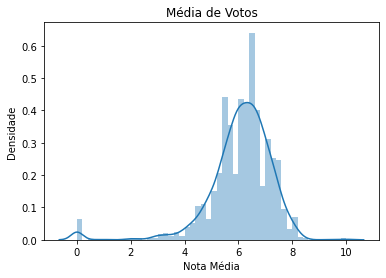

In [3]:
ax = sns.distplot(df_tmb.vote_average)

ax.set(xlabel = 'Nota Média',ylabel='Densidade')
ax.set_title('Média de Votos')

/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos')

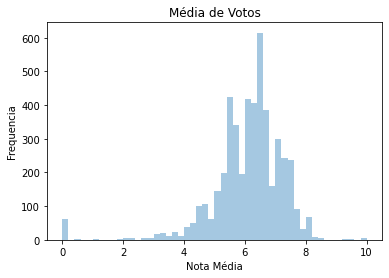

In [4]:
ax = sns.distplot(df_tmb.vote_average,kde=False) #para ver frequência e não a densidade

ax.set(xlabel = 'Nota Média',ylabel='Frequencia')
ax.set_title('Média de Votos')

[Text(0.5, 0, 'Nota Média do Filme')]

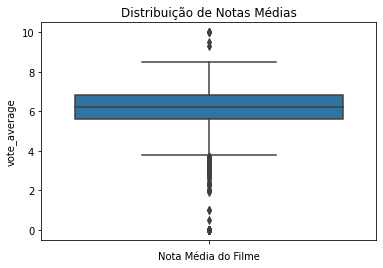

In [5]:
ax = sns.boxplot(y=df_tmb.vote_average)
ax.set_title('Distribuição de Notas Médias')
ax.set(xlabel='Nota Média do Filme')

In [6]:
df_medias_10votos_tmb = df_tmb[df_tmb.vote_count >= 10].vote_average #somente filmes com mais da 10 votos

/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos - Filmes com mais da 10 Votos')

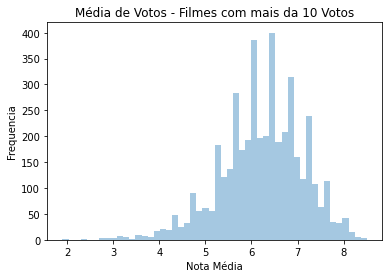

In [7]:
ax = sns.distplot(df_medias_10votos_tmb,kde=False)

ax.set(xlabel = 'Nota Média',ylabel='Frequencia')
ax.set_title('Média de Votos - Filmes com mais da 10 Votos')


[Text(0.5, 0, 'Nota Média do Filme')]

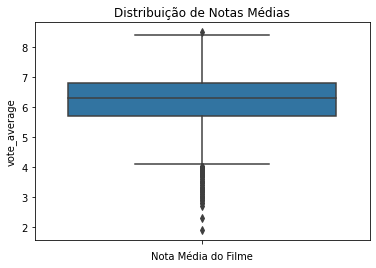

In [8]:
ax = sns.boxplot(y=df_medias_10votos_tmb)
ax.set_title('Distribuição de Notas Médias')
ax.set(xlabel='Nota Média do Filme')

/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Nota do Filme'), Text(0, 0.5, '% acumulada de filmes')]

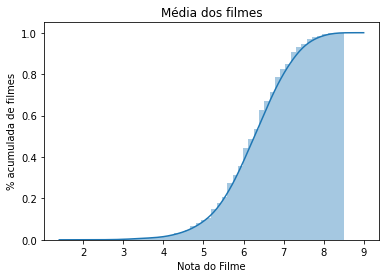

In [9]:
ax = sns.distplot(df_medias_10votos_tmb,
                  hist_kws = {'cumulative':True},
                  kde_kws = {'cumulative':True})
ax.set_title('Média dos filmes')
ax.set(xlabel = 'Nota do Filme',ylabel='% acumulada de filmes')

<h3> Carregando Dados do Movie Lens </h3>

In [20]:
df_lens_ratings =  pd.read_csv('introducao.testes.estatisticos/movie.lens.ratings.csv')
df_lens_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Nota do Filme'), Text(0, 0.5, 'Densidade')]

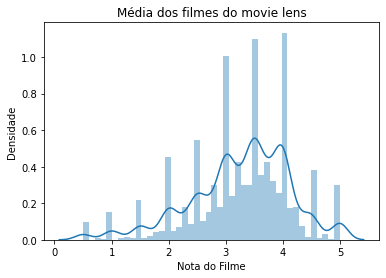

In [21]:
df_medias_lens = df_lens_ratings.groupby('movieId')['rating'].mean()

ax = sns.distplot(df_medias_lens)
ax.set_title('Média dos filmes do movie lens')
ax.set(xlabel = 'Nota do Filme',ylabel='Densidade')

/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Nota do Filme'), Text(0, 0.5, 'Densidade')]

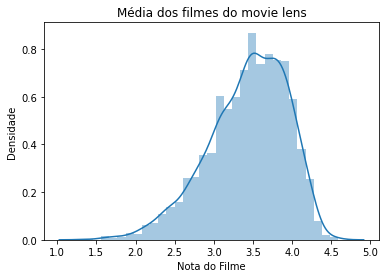

In [22]:
df_medias_10votos_lens = df_medias_lens[df_lens_ratings.groupby('movieId')['rating'].count() >= 10]

ax = sns.distplot(df_medias_10votos_lens)
ax.set_title('Média dos filmes do movie lens')
ax.set(xlabel = 'Nota do Filme',ylabel='Densidade')

[Text(0.5, 0, 'Nota Média do Filme')]

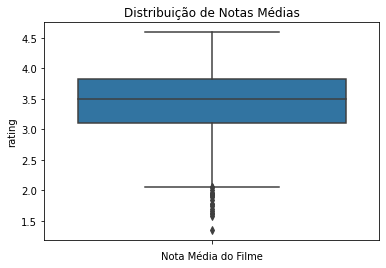

In [23]:
ax = sns.boxplot(y=df_medias_10votos_lens)
ax.set_title('Distribuição de Notas Médias')
ax.set(xlabel='Nota Média do Filme')

/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Nota do Filme'), Text(0, 0.5, '% acumulada de filmes')]

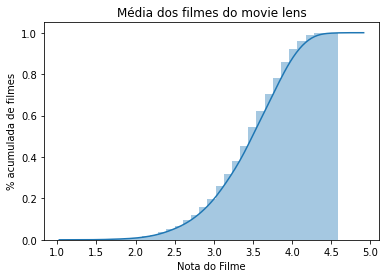

In [24]:
ax = sns.distplot(df_medias_10votos_lens,
                  hist_kws = {'cumulative':True},
                  kde_kws = {'cumulative':True})
ax.set_title('Média dos filmes do movie lens')
ax.set(xlabel = 'Nota do Filme',ylabel='% acumulada de filmes')

<h4>Analisando a distribuição dos dados capturados de outros campos do TMDB</h4>

In [25]:
df_10votos_tmb = df_tmb[df_tmb.vote_count >= 10]
df_10votos_tmb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Número de Votos - Filmes com mais da 10 Votos')

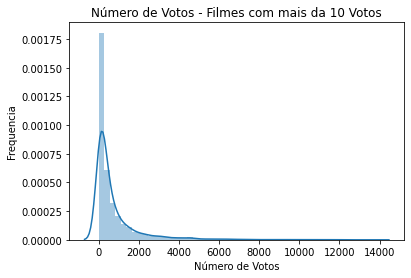

In [26]:
ax = sns.distplot(df_10votos_tmb.vote_count,kde=True)

ax.set(xlabel = 'Número de Votos',ylabel='Frequencia')
ax.set_title('Número de Votos - Filmes com mais da 10 Votos')


/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gastos')

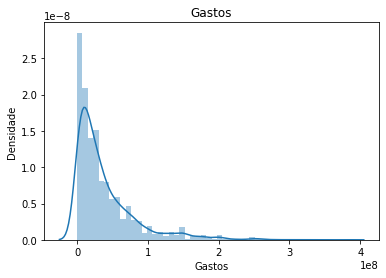

In [27]:
ax = sns.distplot(df_10votos_tmb.query('budget > 0').budget,kde=True)

ax.set(xlabel = 'Gastos',ylabel='Densidade')
ax.set_title('Gastos')

/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularidade')

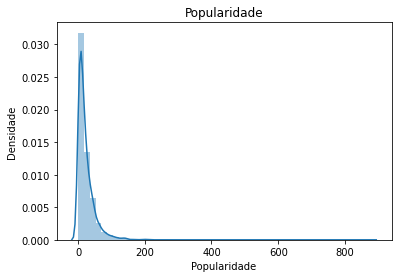

In [28]:
ax = sns.distplot(df_10votos_tmb.popularity,kde=True)
ax.set(xlabel = 'Popularidade',ylabel='Densidade')
ax.set_title('Popularidade')

/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


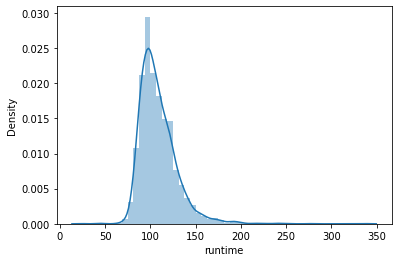

In [29]:
# df.query('runtime > 0').runtime.dropna()
ax = sns.distplot(df_10votos_tmb.query('runtime > 0').runtime.dropna(),kde=True)
# ax.set(xlabel = 'Tempo de filme',ylabel='Densidade')
# ax.set_title('Tempo de filme')

/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Tempo do Filme'), Text(0, 0.5, '% acumulado')]

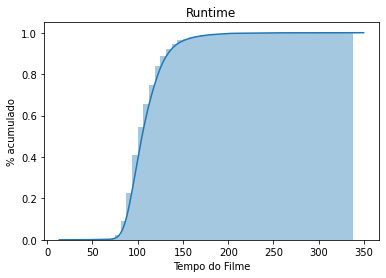

In [30]:
ax = sns.distplot(df_10votos_tmb.query('runtime > 0').runtime.dropna(),
                  hist_kws = {'cumulative':True},
                  kde_kws = {'cumulative':True})
ax.set_title('Runtime')
ax.set(xlabel = 'Tempo do Filme',ylabel='% acumulado')

In [31]:
df_10votos_tmb.query('runtime > 0').runtime.dropna().quantile(0.8)

122.0

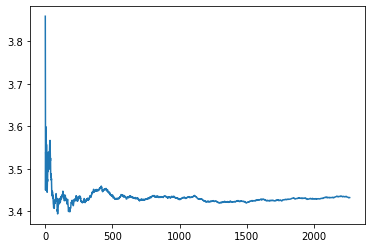

In [32]:
np.random.seed(75243)
#temp = df_medias_10votos_tmb.vote_average.sample(frac=1)
temp = df_medias_10votos_lens.sample(frac=1)
media = list()

for i in range(1,temp.shape[0]):
    media.append(temp[0:i].mean())
plt.plot(media)

<h3>Calculando o intervalo de confiança</h3>

In [136]:

#zconfint(df_medias_10votos_tmb)
display(df_media_10votos_lens.mean())
display(df_media_10votos_lens.std())
display(df_media_10votos_lens.count())
display(zconfint(df_medias_10votos_lens))
desc_medias_10votos_lens = DescrStatsW(df_media_10votos_lens)
display(desc_medias_10votos_lens.tconfint_mean())

3.4320503405352594

0.5056199502942548

2269

(3.4112459477469557, 3.452854733323563)

(3.411234839229381, 3.4528658418411395)

<h3>vamos ver um filme</h3>

In [137]:
filmes_lens = pd.read_csv('introducao.testes.estatisticos/movie.lens.movies.csv')
filmes_lens.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


'Quantidade de Notas: 215'

'Média das Notas: 3.9209302325581397'

'DP das Notas: 0.8348591407114047'

'Intervalo com 95% de Confiança: (3.8093359183563402, 4.032524546759939)'

/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Notas')

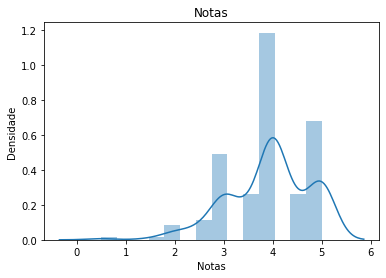

In [151]:
notas_toystory = df_lens_ratings.query('movieId == 1')

display(f'Quantidade de Notas: {notas_toystory.rating.count()}')
display(f'Média das Notas: {notas_toystory.rating.mean()}')
display(f'DP das Notas: {notas_toystory.rating.std()}')
display(f'Intervalo com 95% de Confiança: {zconfint(notas_toystory.rating)}')
ax = sns.distplot(notas_toystory.rating,kde=True)
ax.set(xlabel = 'Notas',ylabel='Densidade')
ax.set_title('Notas')

/home/lcreina/programacao/python/jupyter/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Notas do Filme Toy Story')

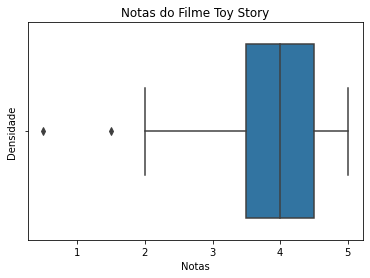

In [146]:
ax = sns.boxplot(notas_toystory.rating)
ax.set(xlabel = 'Notas',ylabel='Densidade')
ax.set_title('Notas do Filme Toy Story')


In [153]:
ztest(notas_toystory.rating,value = 3.432050345352594)

(8.58634222130846, 8.978197010542079e-18)